In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from astropy.io import fits
from matplotlib import colors
from astropy.wcs import WCS

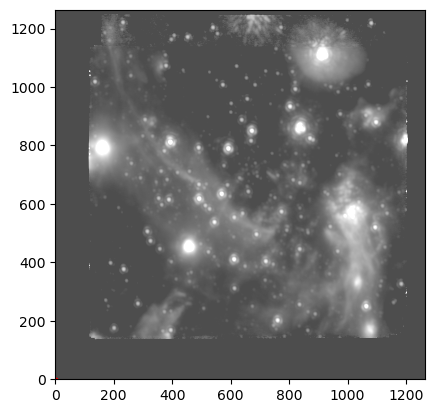

In [2]:
hdu_list = fits.open('/users/ava/Desktop/research/fits/mag20200731nirc2_lp.fits')
imgL = hdu_list[0].data
hdu_list[0].header

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [3]:
from astropy.io import fits

# Open the FITS file
hdul = fits.open('/users/ava/Desktop/research/fits/mag20200731nirc2_lp.fits')

# Get the image data and dimensions
image_data = hdul[0].data  # Assuming the image is in the primary HDU
rows, columns = image_data.shape

# Calculate the number of pixels
num_pixels = rows * columns

# Close the FITS file
hdul.close()

# Print the result
print(rows)
print(columns)
print(f"The FITS image contains {num_pixels} pixels.")

1265
1265
The FITS image contains 1600225 pixels.


In [4]:
filename =  '/users/ava/Desktop/research/lis/m20200731nirc2_lp_1_0.6_stf_cal.lis'
with open(filename) as f:
    for line in f:
        print(line)

       irs16C   8.176003  2020.581   592.33600   787.85602       28.17       1.00        85   10987800.000

      irs16NW   8.599003  2020.581   672.59698   848.36499       28.17       1.00        86    7441130.000

      irs16CC   9.978003  2020.581   490.66501   790.60199       28.17       1.00        85    2090410.000

       irs29N   6.471003  2020.581   837.66602   857.92902       28.17       1.00        86   52854100.000

       star_2   7.076003  2020.581   455.34201   453.06500       28.17       0.97        86   30267700.000

       star_3   7.166003  2020.581  1200.29004   817.21002       28.17       0.89         1   27866300.000

       star_4   7.202003  2020.581   156.69099   791.04700       28.17       0.83        41   26939300.000

      irs16NE   7.549003  2020.581   393.95300   809.59198       28.17       1.00        86   19566600.000

       star_6   7.555003  2020.581   461.63000   455.78799       28.17       0.73        85   19461200.000

       star_7   7.898003  20

5.77944
6.87056
5.3985098
7.251490199999999


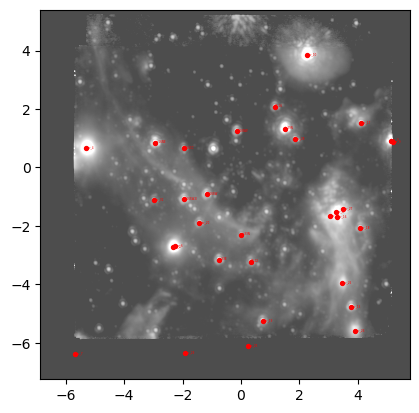

In [5]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

pixels = 1265

x_offset = 0.94720 / 0.01
y_offset = 0.62707 / 0.01

x_pos = 592.336 + x_offset
y_pos = 787.85602 - y_offset

right_arc = (pixels - x_pos)*0.01
left_arc = x_pos*0.01
up_arc = (pixels - y_pos)*0.01
down_arc = y_pos*0.01

print(right_arc)
print(left_arc)
print(up_arc)
print(down_arc)

starpos = np.loadtxt('/users/ava/Desktop/research/lis/m20200731nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-left_arc, right_arc, -down_arc, up_arc], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/Desktop/research/lis/m20200731nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/Desktop/research/lis/m20200731nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 10:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0]-left_arc), (starpos_arcsec[i, 1]-down_arc), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]-left_arc, starpos_arcsec[i, 1]-down_arc], color='red', size=2)

plt.show()